### Supervised learning -Generalized Linear Models
##### suggested readings:An Introduction to Statistical Learning(http://www-bcf.usc.edu/~gareth/ISL/) ,youtube series(http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
##### Robert Nau notes(http://people.duke.edu/~rnau/regintro.htm)

##### The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables.
#####  In mathematical notion, if ^𝑦(pronounced as y-hat) is the predicted value. ^𝑦(𝑤, 𝑥) = 𝑤0 + 𝑤1𝑥1 + ... + 𝑤𝑝𝑥𝑝

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%  matplotlib inline
current_palette = sns.color_palette("Set2")
sns.set_palette(current_palette)
np.set_printoptions(suppress=True, precision=3)
pd.set_option("display.precision",3)

In [2]:
from sklearn.datasets import load_boston
boston =  load_boston()
data = pd.DataFrame(data = boston.data , columns =boston.feature_names)  
target = pd.DataFrame(data = boston.target ,columns =['MEDV'] )


In [3]:
boston_dataset  =pd.concat([data,target],axis=1)

In [4]:
print(boston_dataset.shape)
print(data.shape)
print(target.shape)   

(506, 14)
(506, 13)
(506, 1)


In [5]:
def reg_plots(train_dataset,continuous_features,target_name):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,5, i+1)
        
        if continuous_features[i] !=target_name:
            sns.regplot( x=continuous_features[i],y=target_name, data =train_dataset ,ax=ax,
                        scatter_kws={'cmap':'jet',"alpha": 0.7}  )
            sns.despine()
    plt.tight_layout()
    plt.show()

In [6]:
feature_names =list(boston.feature_names)
target_name ='MEDV'

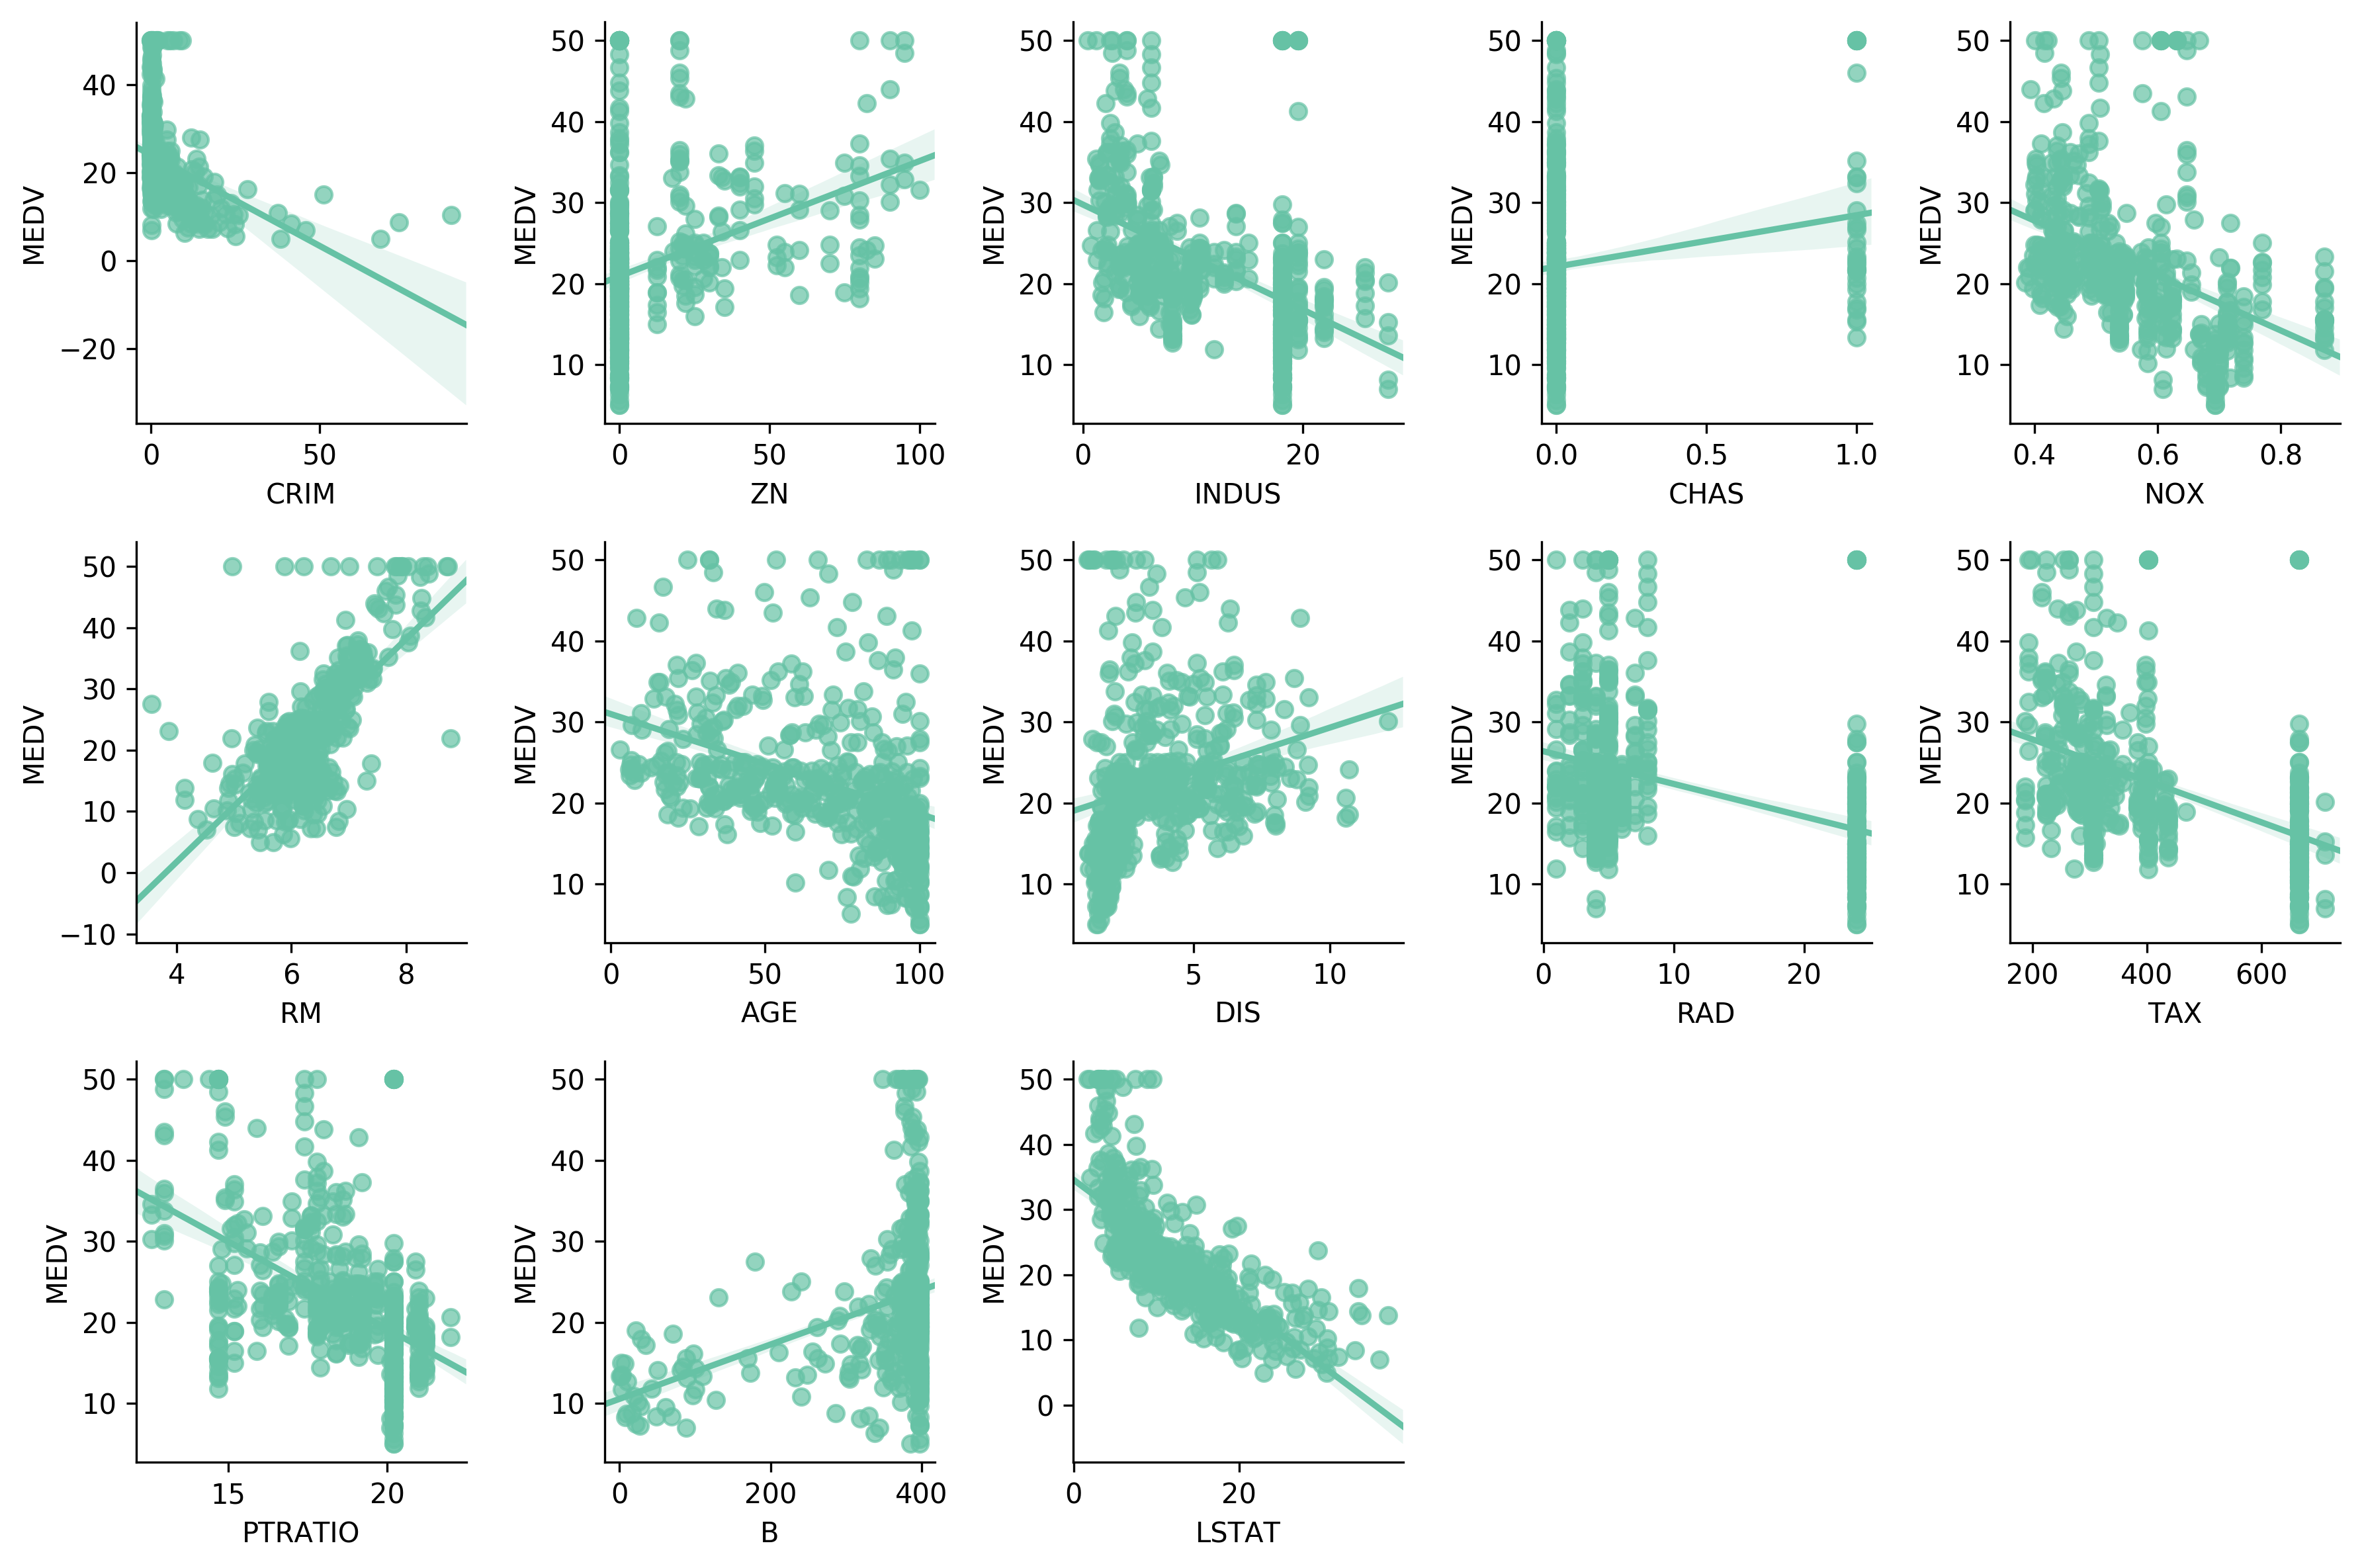

In [7]:
reg_plots(boston_dataset,feature_names,target_name)

### Ordinary Least Squares
#### LinearRegression:Fits a linear model with coefficients 𝑤 = (𝑤1, ...,𝑤𝑝) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.
#### LinearRegression will take in its fit method arrays X, y and will store the coefficients 𝑤 of the linear model in its coef_ member
#### Ridge Regression:Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. 


In [8]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(data,target,random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge 

lr_scores  = np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))
print("Linear Regression scores:{0}".format(lr_scores))
ridge_scores  = np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))
print("Ridge Regression scores:{0}".format(ridge_scores))

Linear Regression scores:0.7160579492011182
Ridge Regression scores:0.7140855225976978


#### Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' :np.logspace(-3,3,13)}

def create_grid_fit(X,y,model,params):
    grid = GridSearchCV(model,params, cv=10, return_train_score=True, iid=False)
    grid.fit(X,y)
    return grid

ridge_grid = create_grid_fit(X_train,y_train,Ridge(),param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)

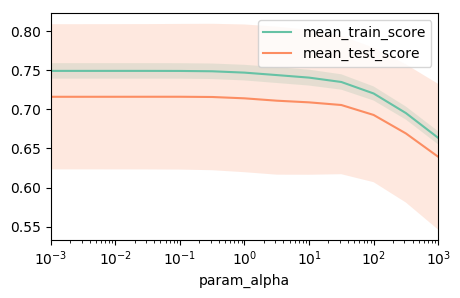

In [11]:
def plot_results(results):
    fig = plt.figure(figsize=(5, 3),dpi=100)
    results.plot('param_alpha', 'mean_train_score',ax=fig.gca())
    results.plot('param_alpha', 'mean_test_score', ax=fig.gca())
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")
    
plot_results(results)

In [12]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003,6.008e-04,0.716,0.749,0.001,{'alpha': 0.001},5,0.783,0.743,0.703,...,0.718,0.749,0.789,0.744,0.545,0.765,9.175e-04,4.905e-04,0.093,0.01
1,0.003,2.002e-04,0.716,0.749,0.00316,{'alpha': 0.00316227766017},4,0.783,0.743,0.703,...,0.718,0.749,0.789,0.744,0.545,0.765,7.821e-04,4.004e-04,0.093,0.01
2,0.002,4.002e-04,0.716,0.749,0.01,{'alpha': 0.01},3,0.783,0.743,0.703,...,0.718,0.749,0.789,0.744,0.545,0.765,8.480e-07,4.902e-04,0.093,0.01
3,0.003,2.001e-04,0.716,0.749,0.0316,{'alpha': 0.0316227766017},2,0.783,0.743,0.703,...,0.718,0.749,0.789,0.744,0.544,0.765,4.004e-04,4.002e-04,0.093,0.01
4,0.002,4.003e-04,0.716,0.749,0.1,{'alpha': 0.1},1,0.782,0.743,0.702,...,0.717,0.749,0.788,0.744,0.544,0.765,4.006e-04,4.902e-04,0.093,0.01


In [13]:
print("Best score: %0.3f" % ridge_grid.best_score_)
print("Best parameters set:")
best_estimator = ridge_grid.best_estimator_
print(best_estimator)


Best score: 0.716
Best parameters set:
Ridge(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


#### Adding features and scaling

In [14]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train)
X_train_std =std_scaler.transform(X_train)
X_test_std =std_scaler.transform(X_test)
poly_features = PolynomialFeatures()
X_train_poly =poly_features.fit_transform(X_train_std)
X_test_poly  = poly_features.transform(X_test_std)

In [15]:
ridge_poly_grid = create_grid_fit(X_train_poly,y_train,Ridge(),param_grid)
poly_results = pd.DataFrame(ridge_poly_grid.cv_results_)
poly_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005,9.016e-04,0.804,0.947,0.001,{'alpha': 0.001},8,0.546,0.948,0.785,...,0.902,0.947,0.848,0.948,0.800,0.950,1.922e-03,9.450e-04,0.103,0.002
1,0.004,7.010e-04,0.803,0.947,0.00316,{'alpha': 0.00316227766017},9,0.548,0.948,0.784,...,0.902,0.947,0.848,0.948,0.799,0.950,9.171e-04,4.589e-04,0.103,0.002
2,0.005,9.018e-04,0.803,0.947,0.01,{'alpha': 0.01},10,0.548,0.948,0.784,...,0.903,0.947,0.848,0.948,0.798,0.950,8.016e-04,7.024e-04,0.102,0.002
3,0.005,6.007e-04,0.803,0.947,0.0316,{'alpha': 0.0316227766017},11,0.548,0.948,0.784,...,0.904,0.947,0.847,0.948,0.796,0.950,1.790e-03,4.905e-04,0.102,0.002
4,0.006,1.301e-03,0.804,0.947,0.1,{'alpha': 0.1},7,0.548,0.948,0.788,...,0.906,0.946,0.848,0.947,0.795,0.949,1.859e-03,1.188e-03,0.100,0.002


Best score: 0.856
Best parameters set:
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 10.0}
0.855834093347
104


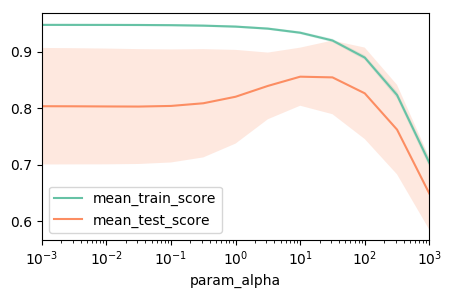

In [16]:
def print_model_details(model,results):
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    print((model.best_estimator_.coef_!= 0).sum())
    plot_results(results)

print_model_details(ridge_poly_grid,poly_results)

In [17]:
from sklearn.linear_model import Lasso, RidgeCV, LassoCV

In [18]:
lasso = Lasso(normalize=True, max_iter=1e6)
lasso_poly_grid = create_grid_fit(X_train_poly,y_train,lasso,param_grid)
lasso_poly_results = pd.DataFrame(lasso_poly_grid.cv_results_)
lasso_poly_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.049,8.999e-04,0.840,0.937,0.001,{'alpha': 0.001},2,0.683,0.938,0.834,...,0.902,0.937,0.882,0.937,0.795,0.940,1.423e-02,5.393e-04,0.071,0.003
1,0.009,5.009e-04,0.855,0.922,0.00316,{'alpha': 0.00316227766017},1,0.862,0.922,0.877,...,0.885,0.922,0.892,0.922,0.801,0.927,1.848e-03,5.009e-04,0.070,0.003
2,0.006,7.012e-04,0.820,0.890,0.01,{'alpha': 0.01},3,0.884,0.889,0.875,...,0.845,0.892,0.888,0.891,0.715,0.891,1.554e-03,4.591e-04,0.111,0.003
3,0.004,5.005e-04,0.768,0.827,0.0316,{'alpha': 0.0316227766017},4,0.824,0.824,0.790,...,0.790,0.828,0.866,0.824,0.603,0.835,1.201e-03,5.005e-04,0.123,0.009
4,0.002,5.003e-04,0.661,0.682,0.1,{'alpha': 0.1},5,0.692,0.680,0.659,...,0.647,0.681,0.717,0.676,0.545,0.704,4.586e-04,5.003e-04,0.072,0.011


Best score: 0.855
Best parameters set:
Lasso(alpha=0.0031622776601683794, copy_X=True, fit_intercept=True,
   max_iter=1000000.0, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0031622776601683794}
0.854665091289
51


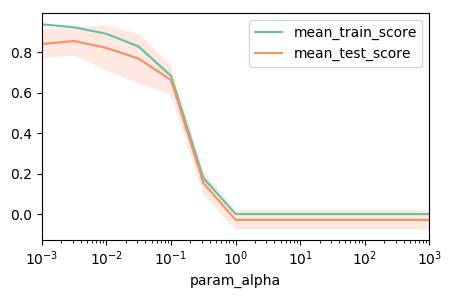

In [19]:
print_model_details(lasso_poly_grid,lasso_poly_results)

#### ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

#### We control the convex combination of L1 and L2 using the l1_ratio parameter. Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [20]:
 
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
elastic_net = ElasticNet(normalize=True, max_iter=1e6)
elastic_net_grid = create_grid_fit(X_train_poly,y_train,elastic_net,param_grid)
elastic_net_results = pd.DataFrame(elastic_net_grid.cv_results_)
elastic_net_results.head()


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.104,9.013e-04,0.855,0.934,0.0001,0.01,"{'l1_ratio': 0.01, 'alpha': 0.0001}",7,0.755,0.935,...,0.897,0.933,0.886,0.934,0.810,0.938,0.015,5.390e-04,0.054,0.002
1,0.087,1.102e-03,0.854,0.935,0.0001,0.1,"{'l1_ratio': 0.1, 'alpha': 0.0001}",10,0.745,0.936,...,0.898,0.934,0.886,0.935,0.809,0.939,0.013,7.013e-04,0.055,0.002
2,0.087,9.018e-04,0.845,0.939,0.0001,0.5,"{'l1_ratio': 0.5, 'alpha': 0.0001}",18,0.683,0.939,...,0.903,0.938,0.883,0.939,0.807,0.942,0.013,3.006e-04,0.065,0.002
3,0.133,6.004e-04,0.818,0.944,0.0001,0.9,"{'l1_ratio': 0.9, 'alpha': 0.0001}",28,0.565,0.944,...,0.908,0.943,0.870,0.944,0.801,0.946,0.016,4.903e-04,0.093,0.002
4,0.209,4.009e-04,0.809,0.945,0.0001,0.98,"{'l1_ratio': 0.98, 'alpha': 0.0001}",32,0.543,0.946,...,0.908,0.944,0.857,0.946,0.799,0.948,0.045,4.910e-04,0.099,0.002


Best score: 0.860
Best parameters set:
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'l1_ratio': 0.9, 'alpha': 0.001}
0.860230016843
78


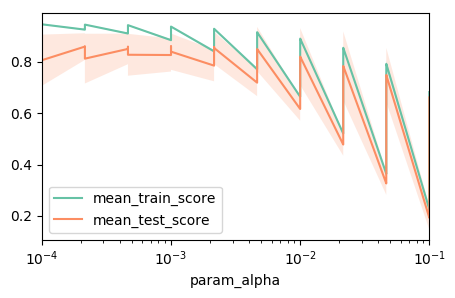

In [21]:
print_model_details(elastic_net_grid,elastic_net_results)

#### Analyzing grid results

In [22]:
elastic_pivot  =  pd.pivot_table(elastic_net_results,values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

In [23]:
elastic_pivot = elastic_pivot.set_index(elastic_pivot.index.values.round(4))

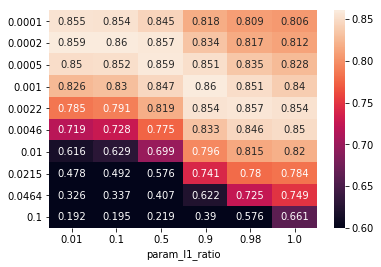

In [24]:
sns.heatmap(elastic_pivot, annot=True, fmt=".3g", vmin=0.6)

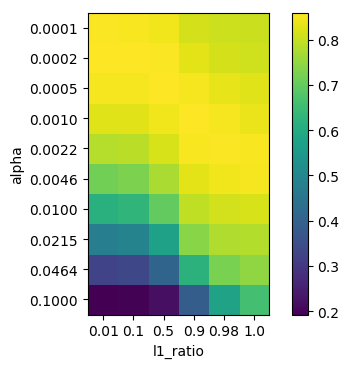

In [25]:
plt.figure(dpi=100)
plt.imshow(elastic_pivot) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [26]:
print("Elastic net best estimator:\n{0}".format(elastic_net_grid.best_estimator_))

Elastic net best estimator:
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [27]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [.98]}
print(param_grid)

elastic_net = ElasticNet(normalize=True, max_iter=1e6)
elastic_net_grid = create_grid_fit(X_train_poly,y_train,elastic_net,param_grid)
elastic_net_results = pd.DataFrame(elastic_net_grid.cv_results_)
elastic_net_results.head()



{'l1_ratio': [0.98], 'alpha': array([ 0.   ,  0.   ,  0.   ,  0.001,  0.002,  0.005,  0.01 ,  0.022,
        0.046,  0.1  ])}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.223,8.011e-04,0.809,0.945,0.0001,0.98,"{'l1_ratio': 0.98, 'alpha': 0.0001}",7,0.543,0.946,...,0.908,0.944,0.857,0.946,0.799,0.948,0.055,4.005e-04,0.099,0.002
1,0.101,6.011e-04,0.817,0.944,0.000215,0.98,"{'l1_ratio': 0.98, 'alpha': 0.000215443469003}",5,0.566,0.944,...,0.908,0.943,0.870,0.944,0.798,0.947,0.021,4.908e-04,0.093,0.002
2,0.044,7.011e-04,0.835,0.941,0.000464,0.98,"{'l1_ratio': 0.98, 'alpha': 0.000464158883361}",4,0.649,0.942,...,0.905,0.940,0.881,0.941,0.798,0.944,0.008,4.590e-04,0.073,0.002
3,0.019,5.009e-04,0.851,0.935,0.001,0.98,"{'l1_ratio': 0.98, 'alpha': 0.001}",2,0.735,0.936,...,0.900,0.935,0.890,0.935,0.803,0.938,0.002,5.009e-04,0.061,0.002
4,0.010,4.007e-04,0.857,0.926,0.00215,0.98,"{'l1_ratio': 0.98, 'alpha': 0.00215443469003}",1,0.836,0.926,...,0.888,0.925,0.894,0.926,0.802,0.930,0.001,4.907e-04,0.063,0.003


Best score: 0.857
Best parameters set:
ElasticNet(alpha=0.0021544346900318821, copy_X=True, fit_intercept=True,
      l1_ratio=0.98, max_iter=1000000.0, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
{'l1_ratio': 0.98, 'alpha': 0.0021544346900318821}
0.857012490272
64


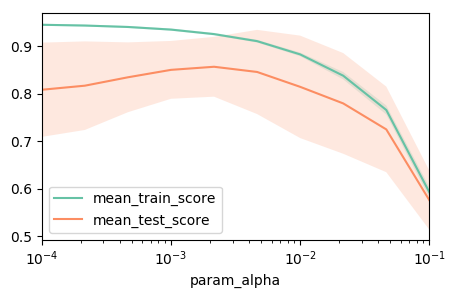

In [28]:
print_model_details(elastic_net_grid,elastic_net_results)

####  Have to study  HuberRegressor, RANSACRegressor , will update  this notebook  once completed